# Parametric maps

pyclesperanto comes with several function to generate parametric maps. These map are quantification and measurement extracted from a labels plotted onto its corresponding labelled image.

In [1]:
import pyclesperanto as cle

from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

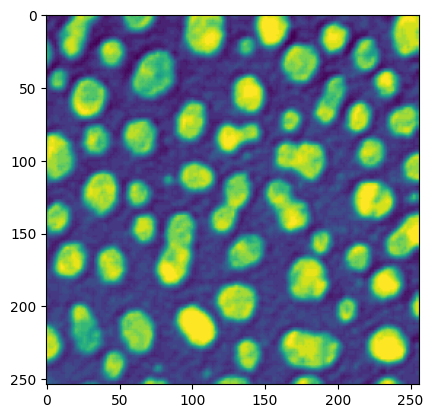

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png').squeeze()
blobs = cle.push(image)

plt.imshow(blobs)

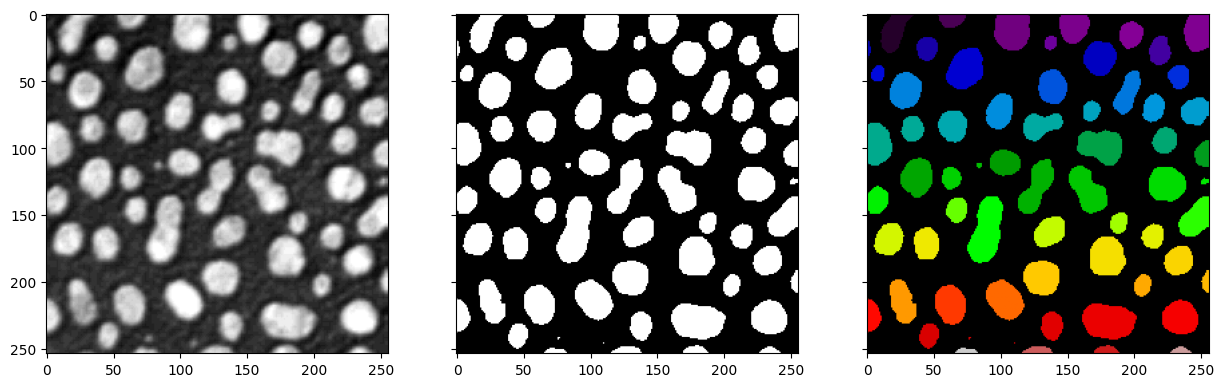

In [3]:
binary = cle.threshold_otsu(blobs)
labels = cle.connected_components_labeling(binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
axs[0].imshow(image, cmap="gray")
axs[1].imshow(binary, cmap="gray")
axs[2].imshow(labels, cmap="nipy_spectral")
plt.show()

# Quantitative maps a.k.a. parametric images

Once the objects are segmented in a label map, we can quantify these objects to extract various measurement (see [Region quantification](./regionprops_and_quantification.ipynb)). 

Parametric map are a way to plot these quantification onto the label map, for visualisation and further analysis.

## Direct parametric map

We can use the function `parametric_map` to plot values computed by the `statistics_of_labelled_pixels` function.

In [5]:
pixel_count_map = cle.parametric_map(labels, property="area")
extension_ratio_map = cle.parametric_map(labels, property="mean_max_distance_to_centroid_ratio")

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(pixel_count_map, cmap="jet")
axs[0].set_title("pixel count map")
axs[1].imshow(extension_ratio_map, cmap="jet")
axs[1].set_title("extension ratio map")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

AttributeError: module 'pyclesperanto' has no attribute 'parametric_map'

Here, the `area` is equivalent to a pixel count due to the absence of pixel size in pyclesperanto.

The extension ratio is a shape descriptor derived from the maximum distance of pixels to their object's centroid divided by the average distance of pixels to the centroid. Which is the `mean_max_distance_to_centroid_ratio` from the statistic dictionary.

It is also possible to use more classic function call `extension_ratio_map()` or `pixel_count_map`.

If we have the intensity corresponding to the label, we can also extract parametric map related to it, such as the average, minimum, maximum and strandard deviation.

In [6]:
mean_intensity_map = cle.parametric_map(blobs, labels, property="mean_intensity")
minimum_intensity_map = cle.parametric_map(blobs, labels, property="min_intensity")
maximum_intensity_map = cle.parametric_map(blobs, labels, property="max_intensity")
stddev_intensity_map = cle.parametric_map(blobs, labels, property="standard_deviation_intensity")
sum_intensity_map = cle.parametric_map(blobs, labels, property="sum_intensity")

fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
axs = np.ravel(axes)
axs[0].imshow(mean_intensity_map, cmap='jet')
axs[0].set_title('Mean intensity map')
axs[1].imshow(minimum_intensity_map, cmap='jet')
axs[1].set_title('Minimum intensity map')
axs[2].imshow(maximum_intensity_map, cmap='jet')
axs[2].set_title('Maximum intensity map')
axs[3].imshow(stddev_intensity_map, cmap='jet')
axs[3].set_title('Standard deviation intensity map')
axs[4].imshow(stddev_intensity_map, cmap='jet')
axs[4].set_title('Sum intensity map')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

AttributeError: module 'pyclesperanto' has no attribute 'parametric_map'

## Neigborborhood and distance maps

An other set of maps, related to neighborhood of labels can also be computed. They provide valuable quantification on the object relation to each other.

They are not based on the `statistics_of_labelled_pixels` hence, they must be used in a more classic way

> Important: Our labels do not touch hence we can either:
> - extending the labels prior the quantification
> - define a distance of neighbor

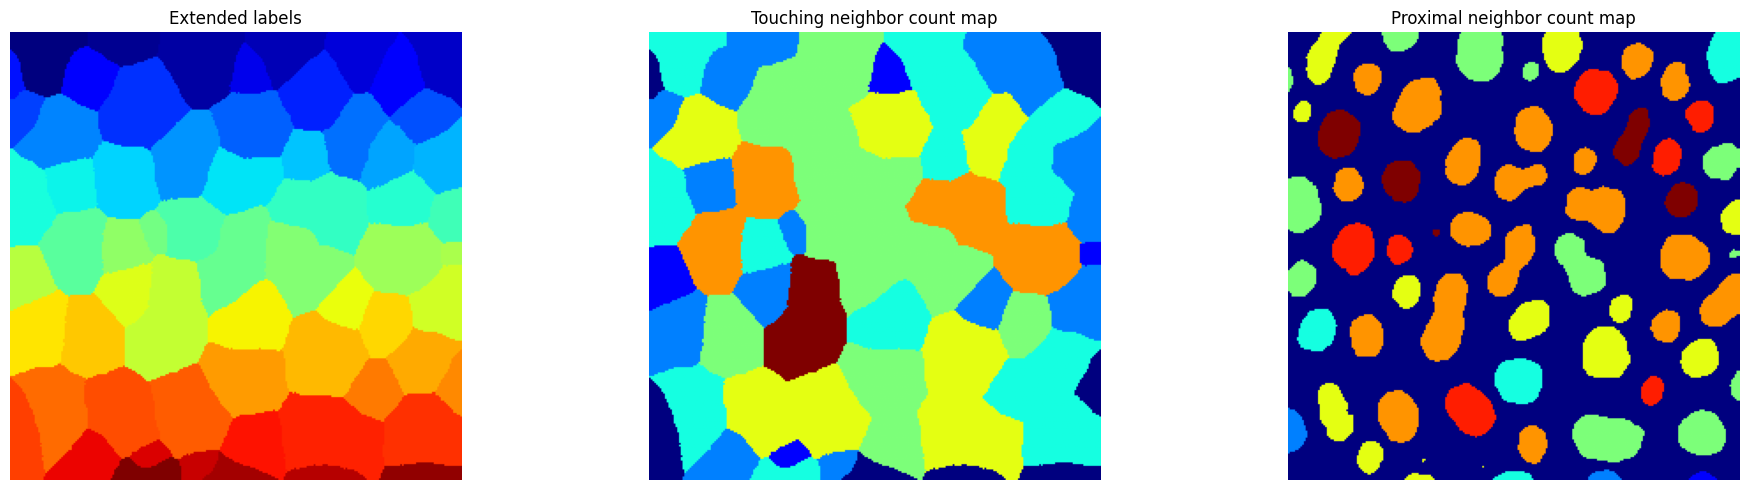

In [8]:
extend_labels = cle.extend_labeling_via_voronoi(labels)
touching_neighbor_count_map = cle.touching_neighbor_count_map(extend_labels)
proximal_neighbor_count_map = cle.proximal_neighbor_count_map(labels, max_distance=50)
# n_nearest_neighbor_distance_map = cle.average_distance_of_n_closest_neighbors_map(labels, n=3)

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axs[0].imshow(extend_labels, cmap='jet')
axs[0].set_title('Extended labels')
axs[1].imshow(touching_neighbor_count_map, cmap='jet')
axs[1].set_title('Touching neighbor count map')
axs[2].imshow(proximal_neighbor_count_map, cmap='jet')
axs[2].set_title('Proximal neighbor count map')
# axs[3].imshow(n_nearest_neighbor_distance_map, cmap='jet')
# axs[3].set_title('N nearest neighbor distance map')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()